In [83]:
import numpy as np
import pylab as pl
import tensorflow as tf

%matplotlib inline

In [58]:
?w.value

In [193]:
tf.reset_default_graph()
w=tf.Variable([30.,10.])
x=tf.placeholder(tf.float32,(2,))
E=1.5*w[0]*w[1]+w[0]**2+w[1]**2

# Two different optimizers -> manually edit optimization loop below to test
opt=tf.train.GradientDescentOptimizer(learning_rate=.55).minimize(E)
adaopt=tf.train.AdagradOptimizer(learning_rate=20).minimize(E)

In [194]:
try: sess.close()
except: pass
sess=tf.Session()
sess.run(tf.global_variables_initializer())
ws=[]
for count in range(50):
    ws.append(sess.run(w))
    if count%10==0: print("E is "+str(sess.run(E)))

    # optimizing
    sess.run(opt)

ws=np.array(ws)

E is 1450.0
E is 294.498
E is 61.9154
E is 13.0207
E is 2.73822


In [195]:
# Generating visualization
xr=pl.linspace(-30,30,100);yr=pl.linspace(-30,30,100)

x,y=pl.meshgrid(xr,yr)
c=np.zeros((100,100))
for cx in range(100):
    for cy in range(100):
        #c[cx,cy]=10*xr[cx]*yr[cy]+xr[cx]+yr[cy]
        c[cx,cy]=xr[cx]**2+yr[cy]**2 + 1.5*xr[cx]*yr[cy]

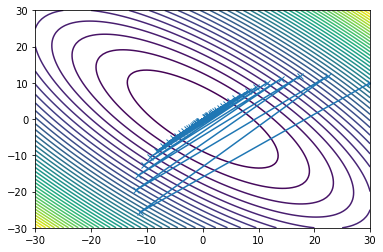

In [196]:
pl.contour(x,y,c,50)
pl.plot(*ws.T,marker='x')